In [2]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

In [3]:
raw_data = pd.read_csv(r"../data/processed_data/oversampled_test.csv", index_col=0)


In [4]:
x = raw_data.drop(["TARGET"], axis=1)
y = raw_data.filter(["TARGET"], axis=1)

scaler = (
    StandardScaler()
)  # MinMaxScaler often made values = 0.0, which = lost features in training
x_scaled = scaler.fit_transform(x)
# y = scaler.fit_transform(y)
# y = y.values  # we dont need to scale our binary classification

# x_scaled = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], )  # data needs to be 3D for a CNN

x_scaled.shape, y.shape


((84806, 120), (84806, 1))

In [5]:
# load trained model
model = tf.keras.models.load_model(r"../models/BayOpt_v1.01")


In [6]:
y_pred = model.predict(x_scaled)


2651/2651 [==============================] - 10s 3ms/step


In [7]:
# convert continuous data to binary
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

In [11]:
# convert continuous data to binary
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# createa a dataframe to house the predictions and true
y_results = pd.DataFrame()
y_results["y_true"] = y
y_results["y_pred"] = y_pred_binary

y_results.head(15).T

,111441,493644,269625,423712,80410,324062,11327,168580,117111,391348,515426,219714,150001,555146,275474
y_true,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
y_pred,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0


In [9]:
# Performance metrics
print(f"{'-'*10} Evaluation Metrics {'-'*10}")

accuracy = accuracy_score(y_results["y_true"], y_results["y_pred"])
print(f"Accuracy: {'%.3f' % accuracy}")

precision = precision_score(y_results["y_true"], y_results["y_pred"])
print(f"Precision: {'%.3f' % precision}")

recall = recall_score(y_results["y_true"], y_results["y_pred"])
print(f"Recall: {'%.3f' % recall}")

f1 = f1_score(y_results["y_true"], y_results["y_pred"])
print(f"F1_score: {'%.3f' % f1}")

auc = roc_auc_score(y_results["y_true"], y_results["y_pred"])
print(f"AUC_score: {'%.3f' % auc}")

# print(classification_report(y_results["y_true"], y_results["y_pred"]))


---------- Evaluation Metrics ----------
Accuracy: 0.914
Precision: 0.970
Recall: 0.853
F1_score: 0.908
AUC_score: 0.913


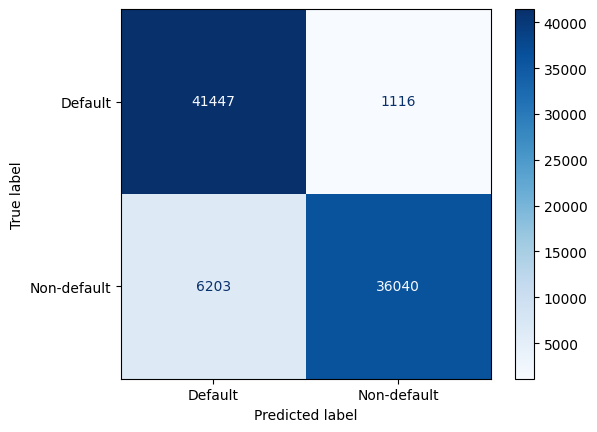

In [10]:
con_matrix = confusion_matrix(y_results["y_true"], y_results["y_pred"])

disp = ConfusionMatrixDisplay(
    confusion_matrix=con_matrix, display_labels=["Default", "Non-default"]
)
disp.plot(cmap=plt.cm.Blues)